In [2]:
from FxDerivative import Vanilla, BarOption, DigOption
from QuantLib import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
vanilla = Vanilla()
vanilla.download_data()
barriera = BarOption()
barriera.mkt = vanilla.mkt
digi = DigOption()
digi.mkt = vanilla.mkt

In [23]:
strike = 1.17
barrier = 1.4
barrier_type = 'knock-in'
date = Date(21, 11, 2025)
option_type = 'call'
N = 100000

In [24]:
vanilla.contract(option_type, strike, date, N)

In [25]:
u = []
v = []
for i in np.linspace(0.9, 1.4, 100):
    vanilla.contract(option_type, i, date, N)
    u.append(vanilla.fx_option.NPV())
    v.append(vanilla.mkt.surface.blackVol(date, i))

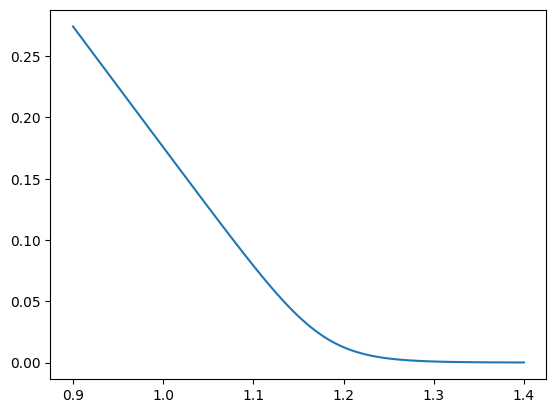

In [26]:
plt.plot(np.linspace(0.9, 1.4, 100), u)

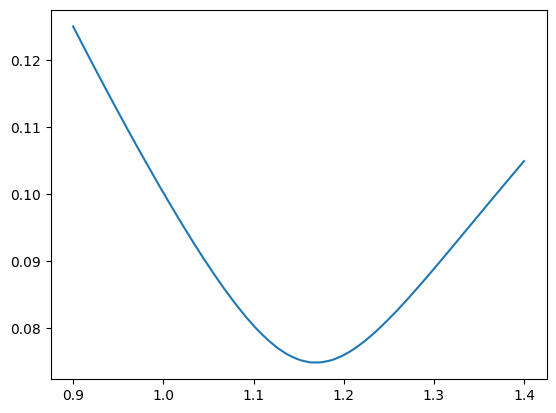

In [27]:
plt.plot(np.linspace(0.9, 1.4, 100), v)

In [28]:
print('Ref:', vanilla.ref, 'option price:', round(vanilla.Premium_EUR(),2), 'EUR')

Ref: 1.1687 option price: 5.15 EUR


In [29]:
barriera.contract(option_type, strike, barrier_type, barrier, date, N)

In [42]:
digi.contract('call', 1.198
              , Date(13, 7, 2026), N)

In [43]:
print('Ref:', vanilla.ref, 'option price:', round(vanilla.Premium_EUR(),2), 'EUR')
print('Ref:', barriera.ref, 'option price:', round(barriera.Premium_EUR(),2), 'EUR')
print('Ref:', digi.ref, 'option price:', round(digi.Premium_EUR(),2), 'EUR')

Ref: 1.1687 option price: 5.15 EUR
Ref: 1.1687 option price: 2.33 EUR
Ref: 1.1687 option price: 38546.25 EUR


In [14]:
a = FXCurve()
a.data_take()
a.fwd_interpolator(Date(4, 8, 2025))

1.1748935000000011

In [18]:
import QuantLib as ql
import numpy as np

# Define market data: strikes, expiries, and market volatilities
strikes = [80, 90, 100, 110, 120]
expiries = [ql.Period(1, ql.Months), ql.Period(3, ql.Months), ql.Period(6, ql.Months), ql.Period(1, ql.Years)]
market_vols = [
    [0.35, 0.30, 0.25, 0.20, 0.18],  # 1 month
    [0.34, 0.29, 0.24, 0.19, 0.17],  # 3 months
    [0.33, 0.28, 0.23, 0.18, 0.16],  # 6 months
    [0.32, 0.27, 0.22, 0.17, 0.15]   # 1 year
]

# Create QuantLib objects
calendar = ql.TARGET()
settlement_date = ql.Date(15, ql.August, 2023)
ql.Settings.instance().evaluationDate = settlement_date

# Create the SABR model
sabr_params = [0.04, 0.5, 0.2, 0.0]  # initial guess for alpha, beta, nu, rho

# Create a SABR interpolation for each expiry
vols_interpolations = []
for i, expiry in enumerate(expiries):
    expiry_date = settlement_date + expiry
    times = ql.Actual365Fixed().yearFraction(settlement_date, expiry_date)
    
    # sabr_interpolation = SabrSmileSection(
    #     times, strikes, market_vols[i], forward=100.0, sabrParams=sabr_params
    # )
    ql.SABRInterpolation()
    
    vols_interpolations.append(sabr_interpolation)

# Example: Retrieve SABR implied volatility for a specific strike and expiry
strike = 105
expiry_index = 2  # 6 months
implied_vol = vols_interpolations[expiry_index].volatility(strike)
print(f"SABR Implied volatility for strike {strike} and 6 months expiry: {implied_vol:.4f}")

# Plot the SABR volatility surface
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

strike_grid = np.linspace(80, 120, 50)
time_grid = np.array([ql.Actual365Fixed().yearFraction(settlement_date, settlement_date + expiry) for expiry in expiries])

X, Y = np.meshgrid(strike_grid, time_grid)
Z = np.array([[vols_interpolations[j].volatility(strike) for strike in strike_grid] for j in range(len(expiries))])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')

ax.set_xlabel('Strike')
ax.set_ylabel('Time to Maturity')
ax.set_zlabel('Implied Volatility')
plt.show()        

TypeError: new_SABRInterpolation() missing required argument 'strikes' (pos 1)

In [ ]:
times, strikes, market_vols[i], forward=100.0, sabrParams=sabr_params

In [20]:
market_vols

[[0.35, 0.3, 0.25, 0.2, 0.18],
 [0.34, 0.29, 0.24, 0.19, 0.17],
 [0.33, 0.28, 0.23, 0.18, 0.16],
 [0.32, 0.27, 0.22, 0.17, 0.15]]

In [35]:
market_vols[0]

[0.35, 0.3, 0.25, 0.2, 0.18]

In [40]:
import QuantLib as ql

# Impostiamo la data di riferimento "oggi"
today = ql.Date(1, 1, 2025)
ql.Settings.instance().evaluationDate = today

# Parametri di mercato simulati
spot_price = 1.10            # Prezzo spot EUR/USD
r_domestic = 0.05            # Tasso risk-free in USD (domestico) 5%
r_foreign = 0.03             # Tasso in EUR (estero) 3% (analogo a dividend yield per l'asset)
day_count = ql.Actual365Fixed()
calendar = ql.TARGET()

# Definiamo le scadenze (1M, 3M, 6M, 1Y) come periodi e calcoliamo le date di scadenza
tenors = [ql.Period(1, ql.Months), ql.Period(3, ql.Months), 
          ql.Period(6, ql.Months), ql.Period(1, ql.Years)]
expiry_dates = [calendar.advance(today, tenor) for tenor in tenors]

# Calcoliamo i tempi in anni per ciascuna scadenza (fraction of year)
expiry_times = [day_count.yearFraction(today, d) for d in expiry_dates]

# Livelli di volatilità ATM simulati per ciascuna scadenza (in decimali, es. 0.10 = 10%)
atm_vols = [0.08, 0.09, 0.10, 0.11]  # 1M, 3M, 6M, 1Y ATM vols

# Strike come percentuali del forward (80%, 90%, 100%, 110%, 120%)
moneynesses = [0.8, 0.9, 1.0, 1.1, 1.2]

# Prepariamo una struttura per mantenere i dati simulati di volatilità per ogni scadenza
market_data = {}  # dict: expiry_time -> list of (strike, vol)
for T, expiry, atm_vol in zip(expiry_times, expiry_dates, atm_vols):
    # Calcola il prezzo forward F = S0 * exp((r_dom - r_for) * T)
    forward = spot_price * ql.BlackScholesMertonProcess(
        ql.QuoteHandle(ql.SimpleQuote(spot_price)),
        ql.YieldTermStructureHandle(ql.FlatForward(today, r_foreign, day_count)),
        ql.YieldTermStructureHandle(ql.FlatForward(today, r_domestic, day_count)),
        ql.BlackVolTermStructureHandle(ql.BlackConstantVol(today, calendar, 0.0, day_count))
    ).stateVariable().value()  # In QuantLib forward can be obtained via process or formula

    # In alternativa: forward = spot_price * math.exp((r_domestic - r_foreign) * T)

    # Genera volatilità per i vari strike come smile (ATM +/- incrementi)
    vol_smile = []
    for m in moneynesses:
        K = m * forward
        # Costruiamo uno smile: ai strike lontani (0.8, 1.2 F) vol = ATM + 2%, a strike intermedi (0.9, 1.1 F) vol = ATM + 1%, ATM = base
        if abs(m - 1.0) < 1e-6:
            vol = atm_vol  # ATM
        elif abs(m - 0.9) < 1e-6 or abs(m - 1.1) < 1e-6:
            vol = atm_vol + 0.01  # 1% sopra ATM
        else:
            vol = atm_vol + 0.02  # 2% sopra ATM per 0.8 e 1.2
        vol_smile.append((K, vol))
    market_data[T] = vol_smile

# Stampa i dati simulati per verifica
for T, smile in market_data.items():
    expiry_label = f"{int(T*12)}M" if T < 1.0 else "1Y"
    print(f"Smile {expiry_label}:")
    for strike, vol in smile:
        print(f"  Strike={strike:.4f},  Vol={vol:.2%}")

Smile 1M:
  Strike=0.9680,  Vol=10.00%
  Strike=1.0890,  Vol=9.00%
  Strike=1.2100,  Vol=8.00%
  Strike=1.3310,  Vol=9.00%
  Strike=1.4520,  Vol=10.00%
Smile 2M:
  Strike=0.9680,  Vol=11.00%
  Strike=1.0890,  Vol=10.00%
  Strike=1.2100,  Vol=9.00%
  Strike=1.3310,  Vol=10.00%
  Strike=1.4520,  Vol=11.00%
Smile 5M:
  Strike=0.9680,  Vol=12.00%
  Strike=1.0890,  Vol=11.00%
  Strike=1.2100,  Vol=10.00%
  Strike=1.3310,  Vol=11.00%
  Strike=1.4520,  Vol=12.00%
Smile 1Y:
  Strike=0.9680,  Vol=13.00%
  Strike=1.0890,  Vol=12.00%
  Strike=1.2100,  Vol=11.00%
  Strike=1.3310,  Vol=12.00%
  Strike=1.4520,  Vol=13.00%


In [43]:
import numpy as np
from math import sqrt
from scipy.optimize import minimize

# Dizionario per salvare i parametri calibrati per ciascun expiry
calibrated_params = {}

for T, smile in market_data.items():
    forward = spot_price * np.exp((r_domestic - r_foreign) * T)  # calcolo forward per questa scadenza
    strikes = np.array([k for k, _ in smile])
    market_vols = np.array([vol for _, vol in smile])
    
    # funzione obiettivo: restituisce l'errore quadratico medio tra vol modello e vol mercato
    def sabr_error(params):
        alpha, beta, rho, nu = params
        model_vols = np.array([ql.sabrVolatility(k, forward, T, alpha, beta, nu, rho) 
                                for k in strikes])
        # errore RMSE
        return sqrt(np.mean((model_vols - market_vols)**2))
    
    # Vincoli/bounds per i parametri: alpha>0, 0<=beta<=1, nu>0, -0.999<=rho<=0.999
    bounds = [(1e-6, None), (0.0, 1.0), (-0.999, 0.999), (1e-6, None)]
    initial_guess = [0.2, 0.5, 0.0, 0.5]  # guess iniziale ragionevole
    
    result = minimize(sabr_error, x0=initial_guess, bounds=bounds, method='L-BFGS-B')
    alpha, beta, rho, nu = result.x
    calibrated_params[T] = (alpha, beta, rho, nu)
    print(f"Calibrazione SABR per T={T:.2f} anni: "
          f"alpha={alpha:.4f}, beta={beta:.4f}, rho={rho:.4f}, nu={nu:.4f}")

Calibrazione SABR per T=0.09 anni: alpha=0.0898, beta=0.4514, rho=-0.1885, nu=0.5392
Calibrazione SABR per T=0.25 anni: alpha=0.0949, beta=1.0000, rho=-0.2624, nu=0.5609
Calibrazione SABR per T=0.50 anni: alpha=0.1039, beta=1.0000, rho=-0.2327, nu=0.5793
Calibrazione SABR per T=1.00 anni: alpha=0.1141, beta=0.8735, rho=-0.1661, nu=0.5736


In [44]:
# Prepara liste di strike (ordinati) e lista di date di scadenza per la superficie
strike_grid = sorted(set(k for smile in market_data.values() for k, _ in smile))
# (strike_grid dovrebbe risultare [0.8F_min, 0.9F_min, ... 1.2F_max] in ordine crescente)
expiry_dates = sorted(expiry_dates)  # già ordinati per costruzione

# Crea una matrice di volatilità di dimensione (n_strikes x n_expiries)
vol_matrix = ql.Matrix(len(strike_grid), len(expiry_dates))
for j, expiry in enumerate(expiry_dates):
    T = day_count.yearFraction(today, expiry)
    forward = spot_price * np.exp((r_domestic - r_foreign) * T)
    alpha, beta, rho, nu = calibrated_params[T]
    for i, K in enumerate(strike_grid):
        # volatilità implicita dal modello SABR calibrato
        vol_matrix[i][j] = ql.sabrVolatility(K, forward, T, alpha, beta, nu, rho)

# Costruisce la BlackVarianceSurface 
vol_surface = ql.BlackVarianceSurface(today, calendar, expiry_dates, strike_grid, vol_matrix, day_count)
vol_surface.enableExtrapolation()  # abilita extr

In [45]:
# Impostazione del processo Black-Scholes-Merton per FX
spot_handle = ql.QuoteHandle(ql.SimpleQuote(spot_price))
domestic_curve = ql.YieldTermStructureHandle(ql.FlatForward(today, r_domestic, day_count))
foreign_curve = ql.YieldTermStructureHandle(ql.FlatForward(today, r_foreign, day_count))
vol_handle = ql.BlackVolTermStructureHandle(vol_surface)

# Processo sottostante con spot, curva domestic (risk-free), curva foreign (dividend), e superficie di volatilità
bsm_process = ql.BlackScholesMertonProcess(spot_handle, foreign_curve, domestic_curve, vol_handle)

# Definizione dell'opzione europea call 9M ATM forward
expiry_9m = calendar.advance(today, ql.Period(9, ql.Months))
payoff = ql.PlainVanillaPayoff(ql.Option.Call,       # tipo Call
                                spot_price * np.exp((r_domestic - r_foreign) * 0.75))  # K = forward 9M ~ S0 * exp((rd-rf)*0.75)
exercise = ql.EuropeanExercise(expiry_9m)
european_option = ql.VanillaOption(payoff, exercise)

# Imposta l'engine di pricing analitico (Black-Scholes europeo)
european_option.setPricingEngine(ql.AnalyticEuropeanEngine(bsm_process))

# Calcola il prezzo (premio) dell'opzione call
option_price = european_option.NPV()
print(f"Prezzo della call 9M (strike ~ forward 9M): {option_price:.4f} USD")

Prezzo della call 9M (strike ~ forward 9M): 0.0419 USD


In [4]:
from QuantLib import *

In [7]:
sabrVolatility(1.15, 1.8, 2,  0.1,0.1,0.1, Beta=0.5)

TypeError: sabrVolatility() got an unexpected keyword argument 'Beta'

In [ ]:
sabrVolatility()

TypeError: Wrong number or type of arguments for overloaded function 'sabrVolatility'.
  Possible C/C++ prototypes are:
    sabrVolatility(Rate,Rate,Time,Real,Real,Real,Real,VolatilityType)
    sabrVolatility(Rate,Rate,Time,Real,Real,Real,Real)


: 

In [19]:
import QuantLib as ql
import numpy as np

In [20]:
strikes = [0.9, 0.95, 1.0, 1.05, 1.10]
vols = [0.18, 0.16, 0.15, 0.155, 0.16]

In [21]:
forward = 1.0  # Forward EUR/USD
expiry = 1.0   # 1 anno

In [22]:
beta = 0.5

sabr = ql.SABRInterpolation(
    strikes,
    vols,
    expiry,
    forward,
    alpha=0.2,   # valore iniziale
    beta=beta,
    nu=0.3,      # valore iniziale
    rho=0.0,     # valore iniziale
    alphaIsFixed=False,
    betaIsFixed=True,  # se True, beta resta fisso
    nuIsFixed=False,
    rhoIsFixed=False
)

In [23]:
print("Alpha =", sabr.alpha())
print("Beta  =", sabr.beta())
print("Nu    =", sabr.nu())
print("Rho   =", sabr.rho())

Alpha = 0.13348142667312873
Beta  = 0.5000000000000001
Nu    = 1.2709464954710064
Rho   = -0.0670766944435636


In [33]:
from FxDerivative import Vanilla
from QuantLib import *



vanilla = Vanilla()
vanilla.download_data()


In [43]:
strike = 1.1

date = Date(13, 7, 2026)

option_type = 'call'

N = 100000
vanilla.contract(option_type, strike, date, N)

print('Ref:', vanilla.ref, 'option price:', round(vanilla.Premium_EUR(),2), 'EUR')

Ref: 1.16815 option price: 7532.74 EUR


In [45]:
import pandas as pd
import numpy as np
from xbbg import blp, pipeline
import datetime as dt
import scipy.interpolate as interpolate
from QuantLib import *
from scipy.optimize import minimize
from scipy.stats import norm
from RateHandle import RateCurve 
from FXHandle import FXCurve
import matplotlib.pyplot as plt


['EURUSDVON Curncy',
 'EURUSDV1W Curncy',
 'EURUSDV2W Curncy',
 'EURUSDV3W Curncy',
 'EURUSDV1M Curncy',
 'EURUSDV2M Curncy',
 'EURUSDV3M Curncy',
 'EURUSDV6M Curncy',
 'EURUSDV9M Curncy',
 'EURUSDV1Y Curncy',
 'EURUSDV2Y Curncy',
 'EURUSDV3Y Curncy',
 'EURUSDV4Y Curncy',
 'EURUSDV5Y Curncy',
 'EURUSDV7Y Curncy',
 'EURUSDV10Y Curncy']

In [53]:

[blp.bdp('EURUSDV{} Curncy'.format(i) , flds=['Security_Name', 'mid','maturity']) for i in ['ON','1W', '2W', '3W','1M', '2M', '3M', '6M', '9M', '1Y', '2Y', '3Y', '4Y', '5Y', '7Y', '10Y']]

[                    mid
 EURUSDVON Curncy  5.325,
                      mid
 EURUSDV1W Curncy  7.6275,
                      mid
 EURUSDV2W Curncy  7.5775,
                    mid
 EURUSDV3W Curncy  7.67,
                     mid
 EURUSDV1M Curncy  7.635,
                     mid
 EURUSDV2M Curncy  7.615,
                      mid
 EURUSDV3M Curncy  7.5125,
                      mid
 EURUSDV6M Curncy  7.4625,
                    mid
 EURUSDV9M Curncy  7.47,
                     mid
 EURUSDV1Y Curncy  7.495,
                      mid
 EURUSDV2Y Curncy  7.6375,
                    mid
 EURUSDV3Y Curncy  7.89,
                      mid
 EURUSDV4Y Curncy  8.0625,
                    mid
 EURUSDV5Y Curncy  8.22,
                      mid
 EURUSDV7Y Curncy  8.4775,
                       mid
 EURUSDV10Y Curncy  8.7125]